In [1]:
import uproot
import subprocess
import awkward as ak
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
from collections import defaultdict
import matplotlib.ticker as mtick

In [2]:
hlt_paths_used = ["HLT_IsoTkMu24", 
"HLT_IsoMu24", 
"HLT_IsoMu27", "HLT_IsoMu19_eta2p1_LooseIsoPFTau20_SingleL1", 
"HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1", 
"HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1", 
"HLT_Ele25_eta2p1_WPTight_Gsf", 
"HLT_Ele32_WPTight_Gsf",
"HLT_Ele32_WPTight_Gsf_L1DoubleEG", 
"HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTau30_eta2p1_CrossL1", 
"HLT_Ele24_eta2p1_WPTight_Gsf_LooseChargedIsoPFTauHPS30_eta2p1_CrossL1", 
"HLT_DoubleMediumIsoPFTau35_Trk1_eta2p1_Reg", 
"HLT_DoubleMediumCombinedIsoPFTau35_Trk1_eta2p1_Reg", 
"HLT_DoubleMediumChargedIsoPFTau40_Trk1_TightID_eta2p1_Reg", 
"HLT_DoubleTightChargedIsoPFTau40_Trk1_eta2p1_Reg",
"HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg", 
"HLT_DoubleMediumDeepTauPFTauHPS35_L2NN_eta2p1"]
needed_branches = hlt_paths_used + ["GenPart_pdgId", "GenPart_genPartIdxMother", "GenPart_eta", "GenPart_pt", "nGenVisTau", "GenVisTau_pt", "GenVisTau_eta", "Tau_eta", "Tau_pt", "Tau_decayMode", "Tau_dz", "Tau_idDeepTau2017v2p1*", 
                                    "FatJet_pt", "FatJet_eta", "FatJet_mass", "FatJet_particleNet_*", "FatJet_particleNet_XttVsQCD"]
zz_signal_das = "/ZZTo2Q2L_mllmin4p0_TuneCP5_13TeV-amcatnloFXFX-pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v1/NANOAODSIM"
zbb_htt_signal_das = "/ZHToTauTau_M125_CP5_13TeV-powheg-pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2/NANOAODSIM"
ztt_hbb_signal_das = "/ZH_HToBB_ZToLL_M-125_TuneCP5_13TeV-powheg-pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v1/NANOAODSIM"

In [3]:
import os
os.environ["X509_USER_PROXY"]

'/home/llr/cms/cuisset/.t3/proxy.cert'

In [4]:
######################## V12 skims
# def open_file(folder:str, idx):
#     try:
#        return uproot.open(f"{folder}/nanoHTT_{idx}_0.root:Events")
#     except OSError:
#     #    try:
#         return uproot.open(f"{folder}/nanoHTT_{idx}_1.root:Events")
#     #    except OSError:
#     #        return uproot.open(f"{folder}/nanoHTT_1_0.root:Events")
# # ar_raw = {mass : [open_file(f"root://eos.grif.fr///eos/grif/cms/llr/store/user/evernazz/HTT/Run2_2018/ZprimeToZH_ZToBB_HToTauTau_M-{mass}", idx).arrays(filter_name=needed_branches, how="zip")
# #     for idx in range(5)]
# #        for mass in [500,600,700,800,1000,1200,1400,1600,1800,2000,2500,3000,3500,4000,4500,5000,5500,6000]}

# ar_raw = {mass : [open_file(f"root://eos.grif.fr///eos/grif/cms/llr/store/user/evernazz/HTT/Run2_2018/GluGluToXToZZTo2B2Tau_M-{mass}", idx).arrays(filter_name=needed_branches, how="zip")
#     for idx in range(2)]
#        for mass in [ 200,  250,  300, 350, 400, 450, 500, 550, # 210, 220, 230, 240, 260, 270, 280,  320,  360,
#                 600, 650, 700, 750, 800, 850, 900, 1000, 1200,  1400, 1600,
#                 1800,  2000,   2500,  3000, 3500, 4000, 4500, 5000]}
# ar_raw = {mass : ak.concatenate(ars) for mass, ars in ar_raw.items()}

In [52]:
getFilesForDas(f"/GluGluToXToZZTo2B2Tau_M-{200}_TuneCP5_13TeV-powheg-pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2/NANOAODSIM")

['root://xrootd-cms.infn.it///store/mc/RunIISummer20UL18NanoAODv9/GluGluToXToZZTo2B2Tau_M-200_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2830000/676C93C0-FCFE-9640-9C80-0CE7CAF1E98D.root',
 'root://xrootd-cms.infn.it///store/mc/RunIISummer20UL18NanoAODv9/GluGluToXToZZTo2B2Tau_M-200_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2830000/7C3F04B5-0355-1D41-BB17-FB136362780F.root',
 'root://xrootd-cms.infn.it///store/mc/RunIISummer20UL18NanoAODv9/GluGluToXToZZTo2B2Tau_M-200_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2830000/CBC949BB-1CCD-0546-910A-FB21021C7CCB.root',
 'root://xrootd-cms.infn.it///store/mc/RunIISummer20UL18NanoAODv9/GluGluToXToZZTo2B2Tau_M-200_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2830000/48BF47B5-5E80-C54F-AEFB-2960B3B6A96F.root',
 'root://xrootd-cms.infn.it///store/mc/RunIISummer20UL18NanoAODv9/GluGluToXToZZTo2B2Tau_M-200_TuneCP

In [56]:
########################### V9
import math
def getFilesForDas(dataset_das):
    res = subprocess.run(["dasgoclient", "-query", "file dataset=" + dataset_das], capture_output=True, text=True, check=True)
    return ["root://xrootd-cms.infn.it//" + path for path in res.stdout.split("\n")]
def concatFiles(paths, max=math.inf):
    ars = []
    count = 0
    for path in paths:
        try:
            ars.append(uproot.open(path + ":Events", timeout=15).arrays(filter_name=needed_branches, how="zip"))
            count += 1
        except OSError as e:
            print(e)
        if count > max:
            break
    return ak.concatenate(ars)
ar_raw = {mass : concatFiles(getFilesForDas(f"/GluGluToXToZZTo2B2Tau_M-{mass}_TuneCP5_13TeV-powheg-pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2/NANOAODSIM"), max=1)
       for mass in [ 200,  250,  300, 350, 400, 450, 500, 550, # 210, 220, 230, 240, 260, 270, 280,  320,  360,
                600, 650, 700, 750, 800, 850, 900, 1000, 1200,  1400, 1600,1800,  2000,   2500,  3000, 3500, 4000, 4500, 5000]}

In [6]:
# def getFilesForDas(dataset_das):
#     res = subprocess.run(["dasgoclient", "-query", "file dataset=" + dataset_das], capture_output=True, text=True, check=True)
#     return ["root://xrootd-cms.infn.it//" + path for path in res.stdout.split("\n")]
# def concatFiles(paths):
#     ars = []
#     for path in paths:
#         try:
#             ars.append(uproot.open(path, timeout=15).arrays(filter_name=needed_branches, how="zip"))
#         except OSError as e:
#             print(e)
#     return ak.concatenate(ars)

def filter_ZToBB(ar):
    return ak.any((abs(ar.GenPart.pdgId) == 5) & (abs(ar.GenPart[ar.GenPart.genPartIdxMother].pdgId) == 23), axis=-1) # b decaying from Z
def filter_ZToTauTau(ar):
    return ak.any((abs(ar.GenPart.pdgId) == 15) & (abs(ar.GenPart[ar.GenPart.genPartIdxMother].pdgId) == 23), axis=-1) # tau decaying from Z
def filter_ZToBB_ZToTauTau(ar):
    # tau decaying from Z & b decaying from Z
    return ak.any((abs(ar.GenPart.pdgId) == 15) & (abs(ar.GenPart[ar.GenPart.genPartIdxMother].pdgId) == 23), axis=-1) & ak.any((abs(ar.GenPart.pdgId) == 5) & (abs(ar.GenPart[ar.GenPart.genPartIdxMother].pdgId) == 23), axis=-1) 
def genPairType_branch(ar):
    """ select etau, mutau, tautau at genlevel"""
    tautau = ar.nGenVisTau == 2

    mutau_genMuon_bool = (abs(ar.GenPart.pdgId) == 13) & (abs(ar.GenPart[ar.GenPart.genPartIdxMother].pdgId) == 15)
    mutau_genMuon_idx = ak.firsts(ak.local_index(ar.GenPart)[mutau_genMuon_bool]) # index of gen muon in GenPart collection
    mutau = (ar.nGenVisTau == 1) & ak.any(mutau_genMuon_bool, axis=-1)
    
    etau_genMuon_bool = (abs(ar.GenPart.pdgId) == 11) & (abs(ar.GenPart[ar.GenPart.genPartIdxMother].pdgId) == 15)
    etau_genMuon_idx = ak.firsts(ak.local_index(ar.GenPart)[etau_genMuon_bool]) # index of gen muon in GenPart collection
    etau = (ar.nGenVisTau == 1) & ak.any(etau_genMuon_bool, axis=-1)
    
    genPairType =  ak.where(mutau, 0, ak.where(etau, 1, ak.where(tautau, 2, -1)))
    genLeptonIdx = ak.where(mutau, mutau_genMuon_idx, etau_genMuon_idx) # for tautau will just put None
    return ak.with_field(ak.with_field(ar, genPairType, where="genPairType"), genLeptonIdx, "genLeptonIdx")
def eff(branch_num, filter_denom):
    try:
        return ak.count_nonzero(branch_num) / ak.count_nonzero(filter_denom)
    except:
        return ak.count_nonzero(branch_num) / len(filter_denom)



class DotDict(dict):
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
deeptau=DotDict(
    vsjet=DotDict(VVVLoose=1, VVLoose=2, VLoose=3, Loose=4, Medium=5,
        Tight=6, VTight=7, VVTight=8),
    vse=DotDict(VVVLoose=1, VVLoose=2, VLoose=3, Loose=4, Medium=5,
        Tight=6, VTight=7, VVTight=8),
    vsmu=DotDict(VLoose=1, Loose=1, Medium=3, Tight=4),
)
def goodtaus_sel(ar):
    base_mask = (
        #(abs(ar.Tau.eta) < max_eta) &
        (ar.Tau.pt > 20) &
        (abs(ar.Tau.dz) < 0.2) &
        ((ar.Tau.decayMode == 0) |(ar.Tau.decayMode == 1) |(ar.Tau.decayMode == 10) | (ar.Tau.decayMode == 11)) &
        (ar.Tau.idDeepTau2017v2p1VSe >= (deeptau.vse.VLoose ) &
        (ar.Tau.idDeepTau2017v2p1VSmu >= (deeptau.vsmu.Tight)) &
        (ar.Tau.idDeepTau2017v2p1VSjet >= deeptau.vsjet.VVVLoose))
    )
    return base_mask
# goodtaus = ar.Tau[goodtaus_sel(ar)]
# goodtaus 

In [7]:
ars = {mass:genPairType_branch(ar_raw[mass]) for mass in ar_raw.keys()}

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Preliminary'))

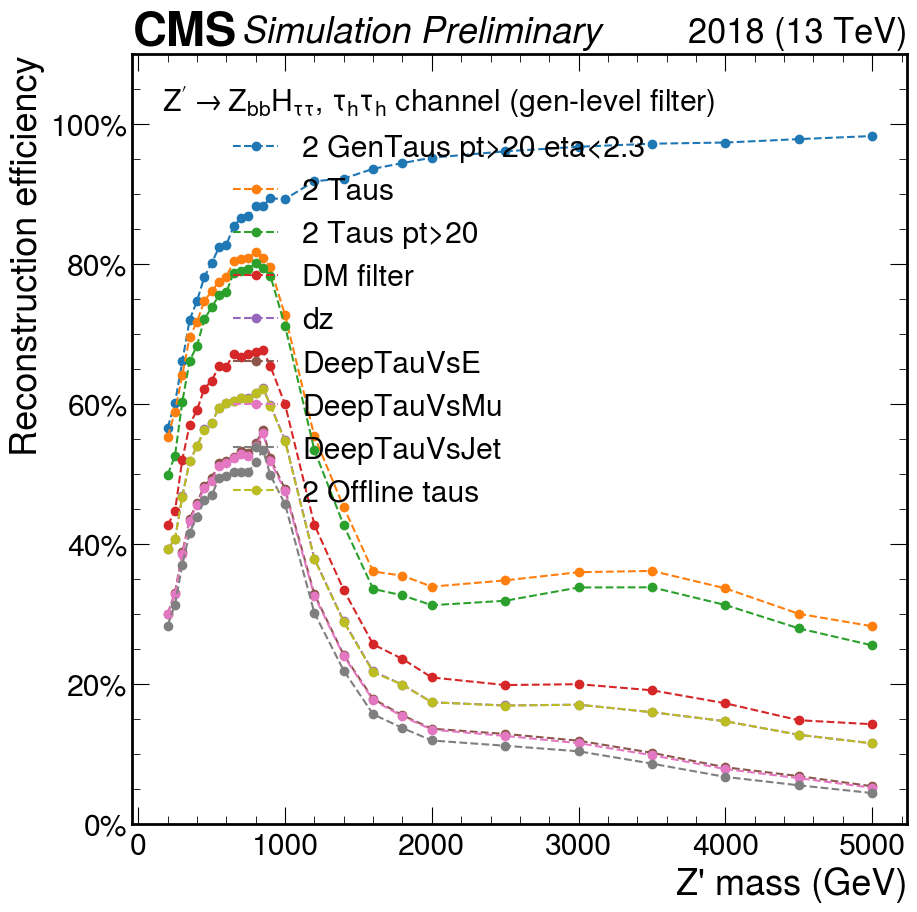

In [48]:
# AN version
effs = defaultdict(dict)
mu_trigs = ["HLT_IsoMu24", "HLT_Mu50", "HLT_OldMu100", "HLT_TkMu100"]
for mass, ar in ars.items():
    genTauTau = ar.genPairType == 2

    genTauTau_good = ak.all((ar.GenVisTau.eta < 2.3) & (ar.GenVisTau.pt >20), axis=-1) & genTauTau
    effs["2 GenTaus pt>20 eta<2.3"][mass] = eff(genTauTau_good, genTauTau)
    # pass_trig = ar[mu_trigs[0]]
    # for trig in mu_trigs[1:]:
    #     pass_trig = pass_trig | (ar[trig])
    # effs["All single muon triggers (low pt | high pt)"][mass] = ak.count_nonzero(pass_trig & genMuTau) / ak.count_nonzero(genMuTau)

    #goodtaus_mask = goodtaus_sel(ar)
    effs["2 Taus"][mass] = eff(genTauTau_good&(ak.num(ar.Tau.pt, axis=-1)>=2), genTauTau)

    taus_mask = (ar.Tau.pt > 20)
    effs["2 Taus pt>20"][mass] = eff(genTauTau_good&(ak.count_nonzero(taus_mask, axis=-1)>=2), genTauTau)

    taus_mask = taus_mask& ((ar.Tau.decayMode == 0) |(ar.Tau.decayMode == 1) |(ar.Tau.decayMode == 10) | (ar.Tau.decayMode == 11))
    effs["DM filter"][mass] = eff(genTauTau_good&(ak.count_nonzero(taus_mask, axis=-1)>=2), genTauTau)

    taus_mask = taus_mask& (abs(ar.Tau.dz) < 0.2)
    effs["dz"][mass] = eff(genTauTau_good&(ak.count_nonzero(taus_mask, axis=-1)>=2), genTauTau)

    taus_mask = taus_mask& (ar.Tau.idDeepTau2017v2p1VSe >= (deeptau.vse.VLoose ))
    effs["DeepTauVsE"][mass] = eff(genTauTau_good&(ak.count_nonzero(taus_mask, axis=-1)>=2), genTauTau)

    taus_mask = taus_mask&(ar.Tau.idDeepTau2017v2p1VSmu >= (deeptau.vsmu.Tight))
    effs["DeepTauVsMu"][mass] = eff(genTauTau_good&(ak.count_nonzero(taus_mask, axis=-1)>=2), genTauTau)

    taus_mask = taus_mask& (ar.Tau.idDeepTau2017v2p1VSjet >= deeptau.vsjet.VVVLoose)
    effs["DeepTauVsJet"][mass] = eff(genTauTau_good&(ak.count_nonzero(taus_mask, axis=-1)>=2), genTauTau)

    goodtaus_mask = (
        #(abs(ar.Tau.eta) < max_eta) &
        (ar.Tau.pt > 20) &
        (abs(ar.Tau.dz) < 0.2) &
        ((ar.Tau.decayMode == 0) |(ar.Tau.decayMode == 1) |(ar.Tau.decayMode == 10) | (ar.Tau.decayMode == 11)) &
        (ar.Tau.idDeepTau2017v2p1VSe >= (deeptau.vse.VLoose ) &
        (ar.Tau.idDeepTau2017v2p1VSmu >= (deeptau.vsmu.Tight)) &
        (ar.Tau.idDeepTau2017v2p1VSjet >= deeptau.vsjet.VVVLoose))
    )

    effs["2 Offline taus"][mass] = eff(genTauTau_good&(ak.count_nonzero(goodtaus_mask, axis=-1)>=2), genTauTau)

    # eff_singlemu_trigger_genmatched[mass] =ak.count_nonzero(singlemu_trigger_matchGen(ar[genMuTau], singlemu_trigger(ar[genMuTau]))) / ak.count_nonzero(genMuTau)

for key, val in effs.items():
    plt.plot(val.keys(), val.values(), "o--", label=key)
# plt.plot(ars.keys(), eff_singlemu_trigger_genmatched.values(), label="HLT_IsoMu24 gen-matched")
plt.xlabel("Z' mass (GeV)")
plt.ylabel("Reconstruction efficiency")
plt.ylim(0, 1.1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title=r"$Z'\to Z_{bb}H_{\tau\tau}$, $\tau_{h}\tau_{h}$ channel (gen-level filter)", loc="upper left")
hep.cms.label("Preliminary", year=2018)
#plt.savefig("studies/cutflow/cutflow_offline_muon_eff.pdf")

In [9]:
ar = ars[200]

In [45]:
eff(ar.genPairType == -1, ar)

0.18586996449124527

In [14]:
ar_thth = ar[ar.genPairType == 2]
ar_thth

<Array [{nGenVisTau: 2, ...}, ..., {...}] type='3275 * {nGenVisTau: int32, ...'>

Text(0.9, 0.9, '$X\\to ZZ (M_X = 200 GeV)$\n$\\tau_h\\tau_h$ channel')

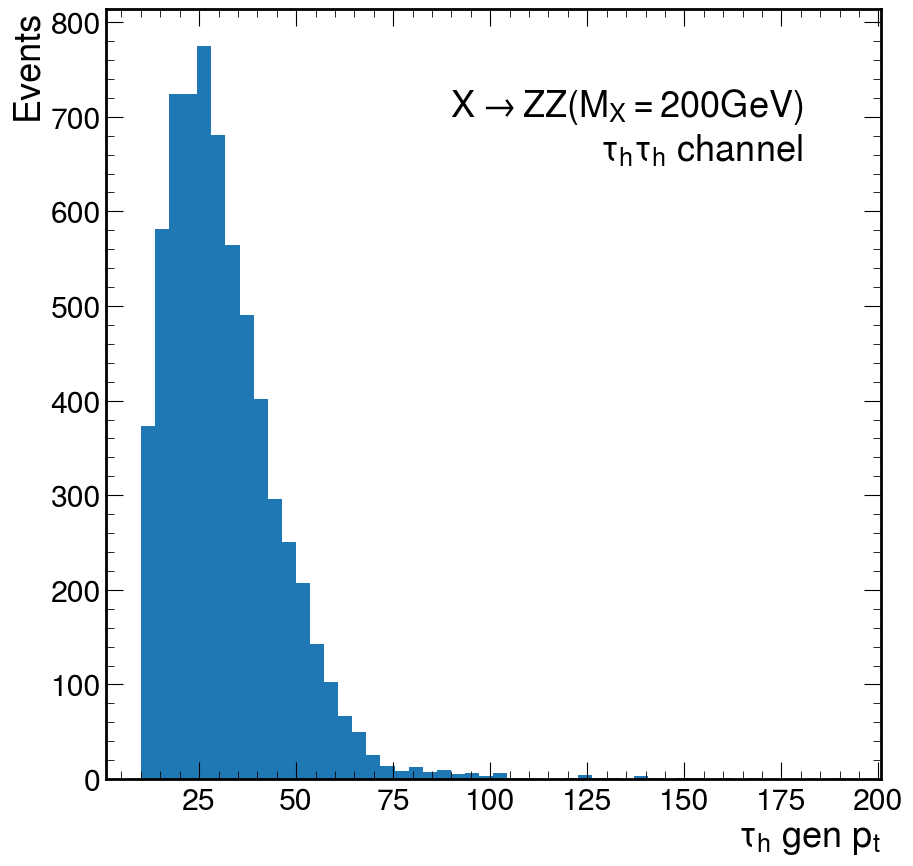

In [24]:
plt.hist(ak.flatten(ar_thth.GenVisTau.pt), bins=50)
plt.xlabel(r"$\tau_h$ gen $p_t$")
plt.ylabel("Events")
plt.text(0.9, 0.9, r"$X\to ZZ (M_X = 200 GeV)$""\n"r"$\tau_h\tau_h$ channel", transform=plt.gca().transAxes, ha="right", va="top")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

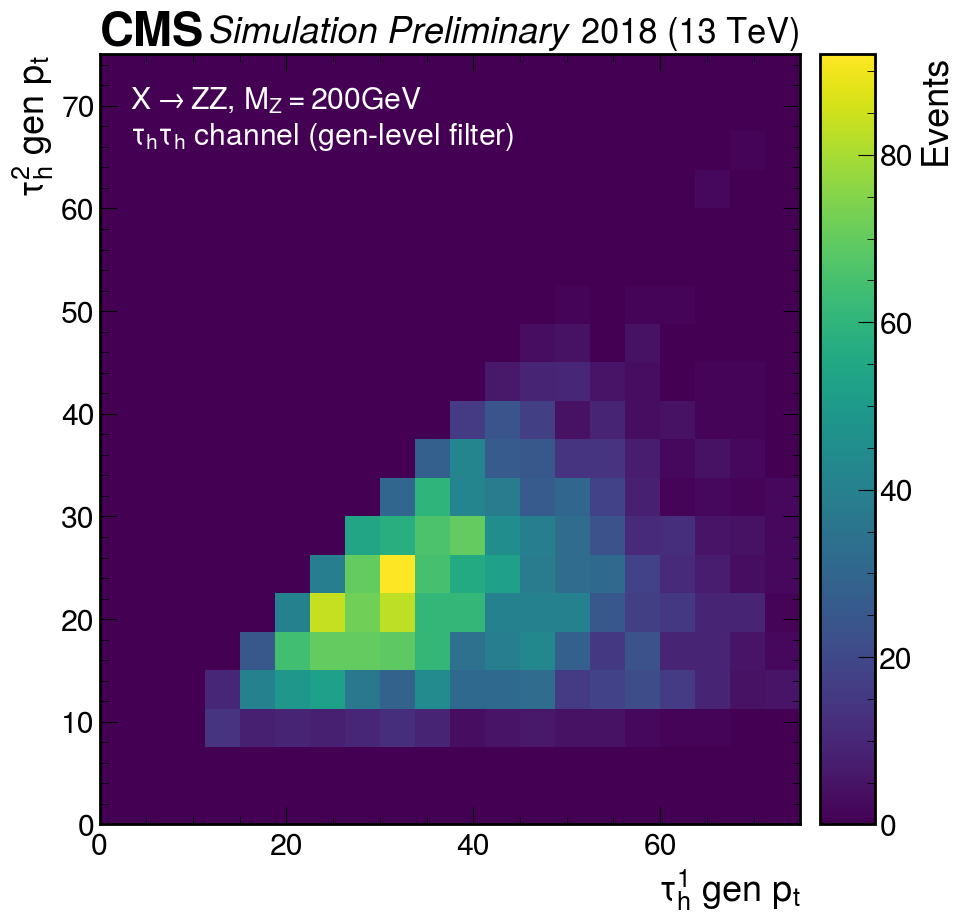

In [49]:
h = hist.Hist(hist.axis.Regular(20, 0, 75, label=r"$\tau_h^1$ gen $p_t$"), hist.axis.Regular(20, 0, 75, label=r"$\tau_h^2$ gen $p_t$"))
h.fill(ar_thth.GenVisTau.pt[:, 0], ar_thth.GenVisTau.pt[:, 1])
_, cbar, _ = hep.hist2dplot(h, flow="none")
cbar.set_label("Events")

plt.setp(plt.legend(title=r"$X\to ZZ$, $M_Z = 200 GeV$""\n"r"$\tau_{h}\tau_{h}$ channel (gen-level filter)", loc="upper left", labelcolor="white").get_title(), color='white')
hep.cms.label("Preliminary", year=2018)